In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import pickle

pd.options.display.max_rows = 100
az.style.use("arviz-darkgrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
df = pd.read_csv('shubidua_demo/shubi_processed.csv')
df.head()

Unnamed: 0  year  releases
0           1  1973         3
1           2  1974         5
2           3  1975         3
3           4  1976         2
4           5  1977         2

In [3]:
with pm.Model() as model:
    lambda1 = pm.HalfCauchy('lambda', beta = 1)
    pm.Poisson('obs', mu = lambda1, observed = df.releases)

In [4]:
with model:
    trace = pm.sample(draws = 1000, tune = 1000, chains = 4)

C:\Users\au467306\Anaconda3\envs\pymc3env\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 95 seconds.


In [5]:
with model:
    az.plot_trace(trace, compact = False)

<IPython.core.display.Javascript object>

In [9]:
with open('fit_model_pymc3.pckl', 'wb') as handle:
    pickle.dump([model, trace], handle)

In [4]:
with open('fit_model_pymc3.pckl', 'rb') as handle:
    fit_model = pickle.load(handle)
trace = fit_model[1]
model = fit_model[0]

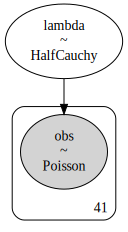

In [4]:
pm.model_to_graphviz(model)